# ml.ipynb -  fine tuned MobileNetV2

In [5]:
import tensorflow as tf

save_dir = ''
loaded_model = tf.keras.models.load_model(save_dir+'/modelMobileNetV2.h5')

classes_list = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 
                'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 
                'kiwi', 'lemon', 'lettuce',  'mango', 'onion', 'orange',  'paprika', 
                'pear', 'peas', 'pineapple', 'pomegrante', 'potato', 'raddish', 'soy beans', 
                'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
len(classes_list)

36

1/1 [==============================] - 0s 54ms/step
prediction: [[2.6149184e-08 4.8239218e-07 8.9550030e-09 2.4989469e-10 5.3187108e-05
  2.0321824e-07 9.9996495e-01 1.5509279e-09 6.1415440e-06 1.5557597e-04
  4.8147206e-07 3.5986730e-07 4.3291937e-08 4.7835847e-06 4.3771184e-08
  1.3904929e-08 3.3312810e-09 2.9000415e-07 3.3391876e-07 8.1320968e-09
  1.8294845e-08 7.2989644e-07 5.7922065e-08 1.4205537e-07 1.6540556e-06
  1.6730466e-08 2.7335501e-09 4.1839852e-09 7.9194378e-06 1.4657936e-11
  3.8952916e-10 6.5868937e-07 3.8923824e-09 2.1105278e-09 6.2242727e-08
  2.7731740e-08]]
sum: 1.0001982412624042
6
0.99996495
Predicted class label: carrot


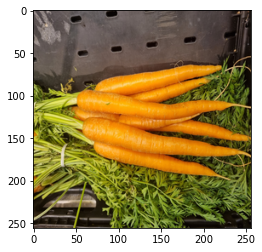

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

batch_size = 32
#image_size = 256
target_size = (256,256)
input_shape = (256, 256, 3)

# return image to numpy form
def preprocess_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path)
    image = image.resize(target_size, Image.Resampling.LANCZOS)
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    plt.imshow(image) # plot the image
    
    return np.expand_dims(image_array, axis=0)  # Add batch dimension


# Select the image for prediction
imgpath_folder = ""
imgpath_folder += "/real_data"
imgpath = imgpath_folder+"/carrot2.jpg"
input_image = preprocess_image(imgpath)
prediction = loaded_model.predict(input_image)


#Prediction
print(f'prediction: {prediction}')
sum=0
for i in range(36):
    sum+=prediction[0][i]
print(f'sum: {sum}')
predicted_class_index = np.argmax(prediction)
print(predicted_class_index)
print(prediction[0][predicted_class_index])
predicted_class_label = classes_list[predicted_class_index]

print("Predicted class label:", predicted_class_label)
